## Depth First Search on the given Graph

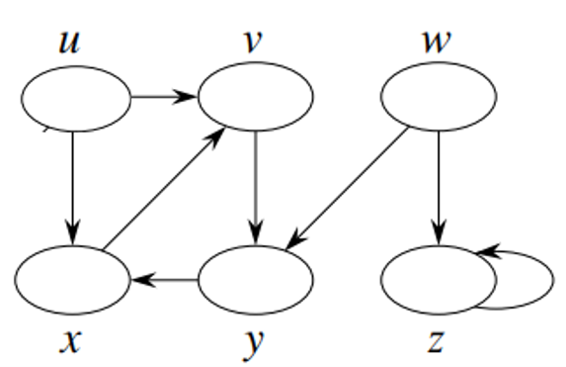

### Define the graph

In [19]:
graph = {
    'u': ['x', 'v'],
    'v': ['y'],
    'w': ['y','z'],
    'x': ['v'],
    'y': [],   
    'z': ['z'],     
}

print(graph)

{'u': ['x', 'v'], 'v': ['y'], 'w': ['y', 'z'], 'x': ['v'], 'y': [], 'z': ['z']}


### Global variables and data structures used in DFS

In [20]:

time = 0
color = {}
for node in graph:
    color[node] = 'WHITE'

discovered = {}
for node in graph:
    discovered[node] = float("inf")

finished = {}
for node in graph:
    finished[node] = float("inf")

parent = {}
for node in graph:
    parent[node] = None

print(color)
print(discovered)
print(finished)
print(parent)

{'u': 'WHITE', 'v': 'WHITE', 'w': 'WHITE', 'x': 'WHITE', 'y': 'WHITE', 'z': 'WHITE'}
{'u': inf, 'v': inf, 'w': inf, 'x': inf, 'y': inf, 'z': inf}
{'u': inf, 'v': inf, 'w': inf, 'x': inf, 'y': inf, 'z': inf}
{'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}


### Runs Depth-First Search on graph G.

In [21]:
def dfs(G):
    for vertex in G:
        if color[vertex] == "WHITE":
            DFS_VISIT(G, vertex)

## Visits a vertex u in DFS.

### Tracks discovery time, finish time, and parent relationships.

In [22]:
def DFS_VISIT(G, vertex):
    global time
    color[vertex] = "GRAY"  
    time += 1
    discovered[vertex] = time

    for neighbour in G[vertex]:
        if color[neighbour] == "WHITE":
            parent[neighbour] = vertex
            DFS_VISIT(G, neighbour)

    color[vertex] = "BLACK"  
    time += 1
    finished[vertex] = time

dfs(graph)

print("color:", color)
print("Discovery times:", discovered)
print("Finish times:", finished)
print("Parents:", parent)

color: {'u': 'BLACK', 'v': 'BLACK', 'w': 'BLACK', 'x': 'BLACK', 'y': 'BLACK', 'z': 'BLACK'}
Discovery times: {'u': 1, 'v': 3, 'w': 9, 'x': 2, 'y': 4, 'z': 10}
Finish times: {'u': 8, 'v': 6, 'w': 12, 'x': 7, 'y': 5, 'z': 11}
Parents: {'u': None, 'v': 'x', 'w': None, 'x': 'u', 'y': 'v', 'z': 'w'}


## Visualise the DFS tree.

C:\Users\manis\AppData\Local\Temp\ipykernel_13396\4177286440.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(scatterpoints=1)


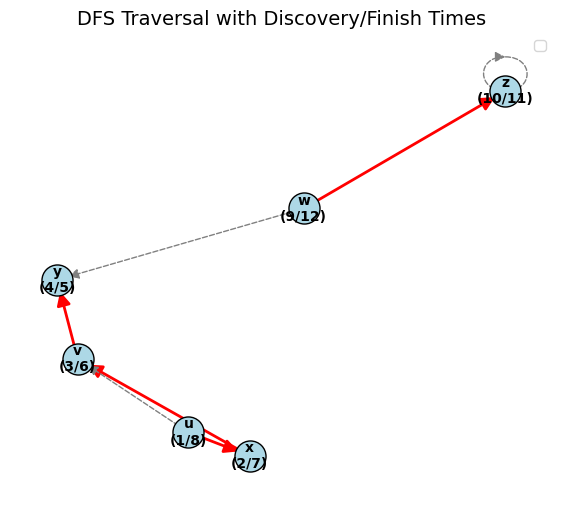

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Build networkx graph ---
G = nx.DiGraph()
for u in graph:
    for v in graph[u]:
        G.add_edge(u, v)

# Positioning
pos = nx.spring_layout(G, seed=42)

# Separate DFS tree edges
tree_edges = [(p, u) for u, p in parent.items() if p is not None]
other_edges = [e for e in G.edges() if e not in tree_edges]

# --- Draw Graph ---
plt.figure(figsize=(7,6))

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=tree_edges, edge_color="red", arrows=True, arrowsize=20, width=2, label="DFS Tree")
nx.draw_networkx_edges(G, pos, edgelist=other_edges, edge_color="gray", style="dashed", arrows=True, arrowsize=15, label="Other Edges")

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500, edgecolors="black")

# Labels: show d/f times
labels = {u: f"{u}\n({discovered[u]}/{finished[u]})" for u in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight="bold")

plt.title("DFS Traversal with Discovery/Finish Times", fontsize=14)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()